## Import Libraries and Data

In [187]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from datetime import datetime

%run utils.ipynb

In [188]:
dos_df_path,fuzzy_df_path,attack_free_df_path=load_data_paths_from_config_to_notebooks("out_paths")

In [189]:
dos_df_pl = pl.read_csv(dos_df_path)
fuzzy_df_pl= pl.read_csv(fuzzy_df_path)
attack_free_df_pl= pl.read_csv(attack_free_df_path)

In [190]:
def convert_pl_to_pd(df):
    return df.to_pandas()

In [191]:
def convert_multiple_pls_to_pds(dfs):
    return [convert_pl_to_pd(df)  for df in dfs]

In [192]:
dos_df_pd,fuzzy_df_pd,attack_free_df_pd=convert_multiple_pls_to_pds([dos_df_pl,fuzzy_df_pl,attack_free_df_pl])

In [193]:
dos_df=dos_df_pd[dos_df_pd["updatedFlag"]==1]
fuzzy_df=fuzzy_df_pd[fuzzy_df_pd["updatedFlag"]==1]

In [194]:
attack_free_in_dos=dos_df_pd[dos_df_pd["updatedFlag"]==0]
attack_free_in_fuzzy=fuzzy_df_pd[fuzzy_df_pd["updatedFlag"]==0]
attack_free_df=pd.concat([attack_free_df_pd,attack_free_in_dos,attack_free_in_fuzzy])
attack_free_df_no_concat=attack_free_df_pd

In [195]:
dos_df["datetime"] = pd.to_datetime(dos_df["datetime"])

fuzzy_df["datetime"] = pd.to_datetime(fuzzy_df["datetime"])
attack_free_df["datetime"] = pd.to_datetime(attack_free_df["datetime"])
attack_free_df_no_concat["datetime"] = pd.to_datetime(attack_free_df_no_concat["datetime"])


C:\Users\Naz\AppData\Local\Temp\ipykernel_12064\2227441829.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dos_df["datetime"] = pd.to_datetime(dos_df["datetime"])
C:\Users\Naz\AppData\Local\Temp\ipykernel_12064\2227441829.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fuzzy_df["datetime"] = pd.to_datetime(fuzzy_df["datetime"])


In [196]:
dos_df.dtypes

updatedCanId             int64
datetime        datetime64[ns]
dlc                      int64
updatedByte0             int64
updatedByte1             int64
updatedByte2           float64
updatedByte3           float64
updatedByte4           float64
updatedByte5           float64
updatedByte6           float64
updatedByte7           float64
updatedFlag              int64
dtype: object

In [197]:
print(dos_df.loc[dos_df["datetime"].isna(), "datetime"])


Series([], Name: datetime, dtype: datetime64[ns])


In [198]:
fuzzy_df.dtypes

updatedCanId             int64
datetime        datetime64[ns]
dlc                      int64
updatedByte0             int64
updatedByte1             int64
updatedByte2           float64
updatedByte3           float64
updatedByte4           float64
updatedByte5           float64
updatedByte6           float64
updatedByte7           float64
updatedFlag              int64
dtype: object

In [199]:
attack_free_df.dtypes

updatedCanId             int64
datetime        datetime64[ns]
dlc                      int64
updatedByte0             int64
updatedByte1             int64
updatedByte2           float64
updatedByte3           float64
updatedByte4           float64
updatedByte5           float64
updatedByte6           float64
updatedByte7           float64
updatedFlag              int64
dtype: object

In [200]:
dos_df["attackType"]=1
fuzzy_df["attackType"]=2
attack_free_df["attackType"]=0


C:\Users\Naz\AppData\Local\Temp\ipykernel_12064\2067426196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dos_df["attackType"]=1
C:\Users\Naz\AppData\Local\Temp\ipykernel_12064\2067426196.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fuzzy_df["attackType"]=2


## Common Methods

In [201]:
def plot_bar_plot(df, column_names):
    if len(column_names) != 2:
        raise ValueError("`column_names` must contain exactly two elements: [x_column, y_column].")
    
    plt.figure(figsize=(12, 6)) 
    
    sns.barplot(x=column_names[0], y=column_names[1], data=df, palette="viridis")

    plt.xlabel(column_names[0], fontsize=14)
    plt.ylabel(column_names[1], fontsize=14)
    plt.title(f"{column_names[0]}-{column_names[1]}", fontsize=16)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)

    plt.tight_layout()
    plt.show()


In [202]:
def plot_count_chart(df,column_name):
    plt.figure(figsize=(10,8))
    
    sns.countplot(x=column_name, data=df, palette='viridis')
    
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [203]:
def plot_bar_chart_of_percentages(df,column_name):
    counts = Counter(df[column_name])
    categories = list(counts.keys())
    values = list(counts.values())
    
    total = sum(values)
    percentages = [value / total * 100 for value in values]
    
    plt.bar(categories, values)
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.title('Bar Chart with Percentages')

    for i, (value, pct) in enumerate(zip(values, percentages)):
        plt.text(i, value, f'{pct:.1f}%', ha='center', fontsize=15)

    plt.show()

In [204]:
def plot_pie_chart(df, column_name):
    data = Counter(df[column_name])
    key_list = list(data.keys())
    val_list = list(data.values())

    fig1, ax1 = plt.subplots()
    wedges, texts, autotexts = ax1.pie(val_list, autopct='%1.1f%%',
                                       shadow=True, startangle=90)
    ax1.legend(wedges, key_list, title="Categories", loc="center left",
               bbox_to_anchor=(1, 0, 0.5, 1))
    plt.show()

In [205]:
def plot_hist(df, column_name,bin_number):
    plt.figure(figsize=(8, 6))
    
    plt.hist(df[column_name], bins=bin_number, edgecolor="black", alpha=0.7)

    plt.xlabel(column_name)
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {column_name}")
    plt.show()

In [206]:
def plot_line_graph(df,x,y):
    
    sns.set_theme(style="whitegrid") 

    plt.figure(figsize=(12, 6)) 
    sns.lineplot(data=df, x=x, y=y)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f"{x}--{y}")

    plt.show()


## Univariate Analysis

#### Quick Analysis

In [207]:
print(dos_df.shape)
print(fuzzy_df.shape)
print(attack_free_df.shape)

(587521, 13)
(491847, 13)
(7414132, 13)


In [208]:
dos_df.head()

,updatedCanId,datetime,dlc,updatedByte0,updatedByte1,updatedByte2,updatedByte3,updatedByte4,updatedByte5,updatedByte6,updatedByte7,updatedFlag,attackType
1475,0,2016-11-03 18:39:37,8,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
1477,0,2016-11-03 18:39:37,8,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
1479,0,2016-11-03 18:39:37,8,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
1481,0,2016-11-03 18:39:37,8,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
1483,0,2016-11-03 18:39:37,8,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,1


In [209]:
fuzzy_df.head()

,updatedCanId,datetime,dlc,updatedByte0,updatedByte1,updatedByte2,updatedByte3,updatedByte4,updatedByte5,updatedByte6,updatedByte7,updatedFlag,attackType
1566,223,2016-11-03 17:55:22,8,140,171,242.0,38.0,122.0,41.0,26.0,12.0,1,2
1567,1770,2016-11-03 17:55:22,8,37,16,156.0,237.0,91.0,22.0,44.0,24.0,1,2
1568,765,2016-11-03 17:55:22,8,63,189,104.0,243.0,195.0,79.0,40.0,212.0,1,2
1575,301,2016-11-03 17:55:22,8,53,69,153.0,207.0,9.0,128.0,199.0,119.0,1,2
1579,826,2016-11-03 17:55:22,8,28,4,134.0,144.0,127.0,8.0,126.0,201.0,1,2


In [210]:
attack_free_df.head()

,updatedCanId,datetime,dlc,updatedByte0,updatedByte1,updatedByte2,updatedByte3,updatedByte4,updatedByte5,updatedByte6,updatedByte7,updatedFlag,attackType
0,848,2016-11-14 11:03:54,8,5,40,132.0,102.0,109.0,0.0,0.0,162.0,0,0
1,704,2016-11-14 11:03:54,8,20,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,1072,2016-11-14 11:03:54,8,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,1201,2016-11-14 11:03:54,8,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,497,2016-11-14 11:03:54,8,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


#### updatedCanId

In [211]:
# plot_count_chart(dos_df,"updatedCanId")

In [212]:
# plot_hist(fuzzy_df, "updatedCanId",100)

In [213]:
attack_free_df["updatedCanId"].nunique()


38

In [214]:
# plot_count_chart(attack_free_df,"updatedCanId")

In [215]:
# plot_hist(attack_free_df, "updatedCanId",10)

#### dlc

In [216]:
# plot_pie_chart(dos_df,"dlc")

In [217]:
# plot_pie_chart(fuzzy_df,"dlc")

In [218]:
# plot_bar_chart_of_percentages(attack_free_df,"dlc")

In [219]:
attack_free_df["dlc"].value_counts()

dlc
8    7234373
5     104057
2      75699
6          3
Name: count, dtype: int64

In [220]:
# plot_hist(attack_free_df, "dlc",3)

#### updatedBytes

In [221]:
[dos_df[f"updatedByte{i}"].unique() for i in range(8)]

[array([0]),
 array([0]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.])]

In [222]:
[fuzzy_df[f"updatedByte{i}"].nunique() for i in range(8)]

[256, 256, 256, 256, 256, 256, 256, 256]

In [223]:
fuzzy_df[[f"updatedByte{i}" for i in range(8)]].corr()

,updatedByte0,updatedByte1,updatedByte2,updatedByte3,updatedByte4,updatedByte5,updatedByte6,updatedByte7
updatedByte0,1.000000,0.000455,0.002689,-0.000088,0.001078,0.001206,-0.000723,0.001183
updatedByte1,0.000455,1.000000,-0.002500,-0.001729,0.000309,-0.000105,-0.000188,-0.002880
updatedByte2,0.002689,-0.002500,1.000000,-0.000476,0.000785,0.001151,-0.001414,0.001229
updatedByte3,-0.000088,-0.001729,-0.000476,1.000000,0.000964,-0.001577,-0.001520,-0.001691
updatedByte4,0.001078,0.000309,0.000785,0.000964,1.000000,0.000362,-0.000149,-0.000822
updatedByte5,0.001206,-0.000105,0.001151,-0.001577,0.000362,1.000000,-0.000459,-0.001601
updatedByte6,-0.000723,-0.000188,-0.001414,-0.001520,-0.000149,-0.000459,1.000000,-0.001957
updatedByte7,0.001183,-0.002880,0.001229,-0.001691,-0.000822,-0.001601,-0.001957,1.000000


In [224]:
[attack_free_df[f"updatedByte{i}"].nunique() for i in range(8)]

[256, 256, 256, 256, 256, 256, 228, 256]

In [225]:
attack_free_df[[f"updatedByte{i}" for i in range(8)]].corr()

,updatedByte0,updatedByte1,updatedByte2,updatedByte3,updatedByte4,updatedByte5,updatedByte6,updatedByte7
updatedByte0,1.000000,0.219643,-0.168148,-0.189503,0.250136,0.086862,-0.140091,-0.221808
updatedByte1,0.219643,1.000000,0.179220,0.154030,-0.028530,0.171493,-0.253561,0.121092
updatedByte2,-0.168148,0.179220,1.000000,0.080260,0.261321,-0.136374,0.270401,0.083953
updatedByte3,-0.189503,0.154030,0.080260,1.000000,0.067028,0.564374,-0.042694,-0.042733
updatedByte4,0.250136,-0.028530,0.261321,0.067028,1.000000,0.315744,0.146553,-0.013186
updatedByte5,0.086862,0.171493,-0.136374,0.564374,0.315744,1.000000,0.003467,-0.127207
updatedByte6,-0.140091,-0.253561,0.270401,-0.042694,0.146553,0.003467,1.000000,-0.132757
updatedByte7,-0.221808,0.121092,0.083953,-0.042733,-0.013186,-0.127207,-0.132757,1.000000


#### updatedFlag

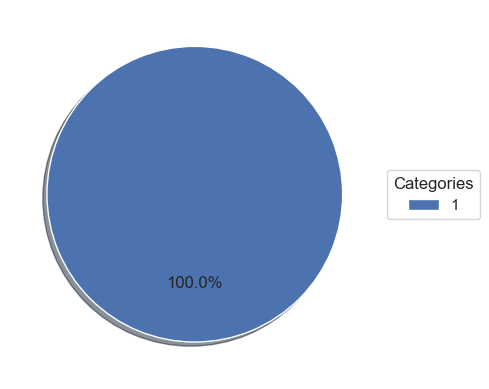

In [226]:
plot_pie_chart(dos_df,"updatedFlag")

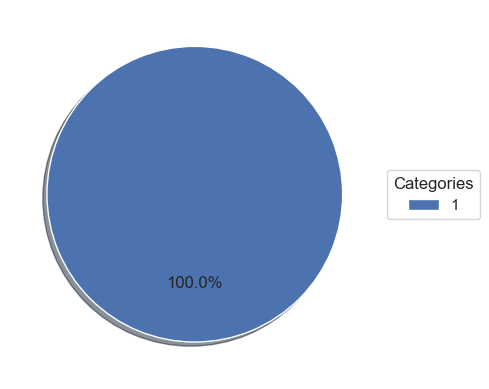

In [227]:
plot_pie_chart(fuzzy_df,"updatedFlag")

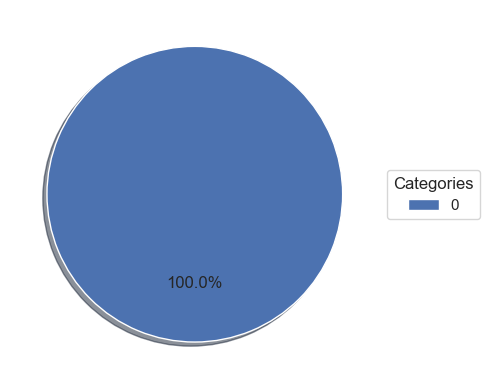

In [228]:
plot_pie_chart(attack_free_df,"updatedFlag")

### Insights about Univariate Analysis


#### **Shape**
- **DOS Dataset:** Shape is `(587,521, 6)`  
- **Fuzzy Dataset:** Shape is `(491,847, 6)`  
- **Attack-Free Dataset:** Shape is `(7,414,132, 6)`  

#### **Updated CAN ID**
- **DOS Dataset:** Contains only a single value: `0`.  
- **Fuzzy Dataset:** 
  - Contains **2,048 unique IDs** ranging between `0` and `2,047`.  
  - Observing the top 100 most used IDs reveals a **uniform distribution**.  
- **Attack-Free Dataset:** 
  - Contains **38 unique IDs** with a **non-normal distribution**.  
  - This dataset appears to be a **combination of multiple sources**, as it includes attack-free samples from the DOS, Fuzzy, and original attack-free datasets.  

#### **DLC (Data Length Code)**
- **DOS Dataset:** Limited to **8 as unique value**.  
- **Fuzzy Dataset:** Limited to **8 as unique value**.  
- **Attack-Free Dataset:** Includes values such as **2, 5, 6, and 8**, but values other than `8` are **extremely rare**. These may be removed during data cleaning for simplification.  
#### **UpdatedByte0 to UpdatedByte7**
- **DOS Dataset:** Contains only a single value: `0`.    
- **Fuzzy Dataset:** Contains 256 unique values in each byte column. Correlation between byte columns does not represent meaningfull information, instead show some little noise. 
- **Attack-Free Dataset:** Contains 256 unique values in each byte column. Strong correlations occur rather than fuzzy dataset. Columns like updatedByte0, updatedByte4, and updatedByte2 show moderate positive correlations with one another


#### **Updated Flag**
- **DOS Dataset:** All values are labeled as `injected`.  
- **Fuzzy Dataset:** All values are labeled as `injected`.  
- **Attack-Free Dataset:** All values are labeled as `normal`.  


## Bivariate Analysis

In [237]:
dos_df_resampled = dos_df.resample('min',on='datetime').mean()
fuzzy_df_resampled = fuzzy_df.resample('min',on='datetime').agg(lambda x: x.mode()[0])
attack_free_no_concat_resampled = attack_free_df_no_concat.resample('min',on='datetime').agg(lambda x: x.mode()[0])

####  Datetime-UpdatedCanId

In [238]:
# plot_line_graph(dos_df_resampled,"datetime","updatedCanId")

- there is only 0 value while dos attack happens

In [266]:
# plot_line_graph(fuzzy_df_resampled,"datetime","updatedCanId")

- can id values are random

In [240]:
# plot_line_graph(attack_free_no_concat_resampled,"datetime","updatedCanId")

In [232]:
dos_df.columns

Index(['updatedCanId', 'datetime', 'dlc', 'updatedByte0', 'updatedByte1',
       'updatedByte2', 'updatedByte3', 'updatedByte4', 'updatedByte5',
       'updatedByte6', 'updatedByte7', 'updatedFlag', 'attackType'],
      dtype='object')

#### Datetime-DLC

In [241]:
# plot_line_graph(dos_df_resampled,"datetime","dlc")

In [242]:
# plot_line_graph(fuzzy_df_resampled,"datetime","dlc")

In [250]:
# plot_line_graph(attack_free_no_concat_resampled,"datetime","dlc")

- dos and fuzzy have only 8 as dlc value, whereas attack-free has some other values but neverthless 8 is most used.

#### Datetime-UpdatedBytes

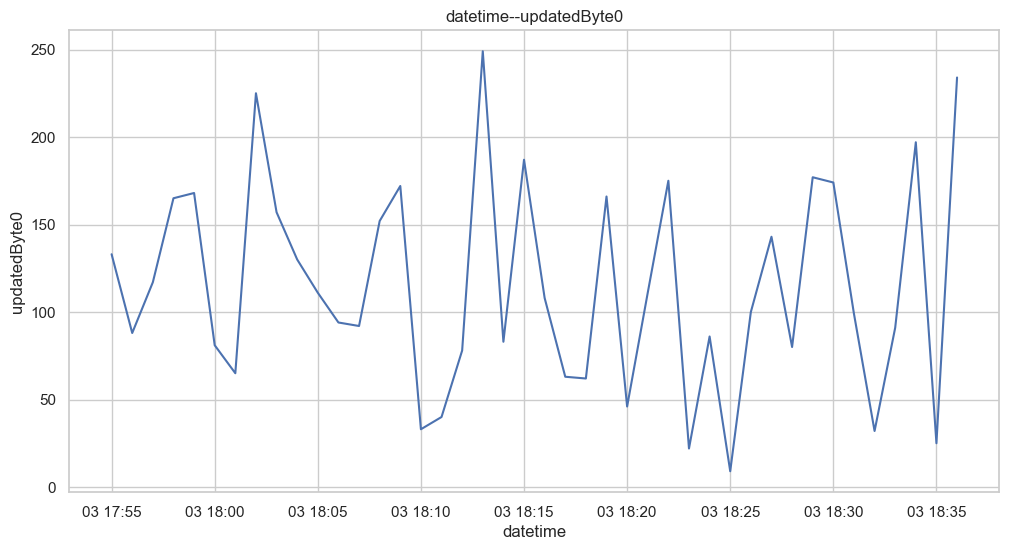

In [260]:
plot_line_graph(fuzzy_df_resampled,"datetime","updatedByte0")